In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from random import randint

In [4]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [5]:
mnist_train = MNIST(root="../datasets",
                    train=True,
                    download=True,
                    transform=ToTensor(),
                    target_transform=None)

mnist_test = MNIST(root="../datasets",
                         train=False,
                         download=True,
                         transform=ToTensor(),
                         target_transform=None)

In [6]:
train_X, train_y = mnist_train.data.float(), mnist_train.targets
test_X, test_y = mnist_test.data.float(), mnist_test.targets

tensor(0)
torch.Size([28, 28])


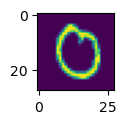

In [60]:
r = randint(0,60000)
sample_X, sample_y = train_X[r], train_y[r]
plt.figure(figsize=(1,1))
plt.imshow(sample_X.squeeze())
print(sample_y)
print(sample_X.shape)

In [8]:
BS = 32
train_dataloader = DataLoader(dataset=mnist_train, 
                              batch_size=BS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=mnist_test,
                             batch_size=BS,
                             shuffle=False)

In [9]:
sample_X.unsqueeze(dim=0).shape

torch.Size([1, 28, 28])

In [10]:
class model1(nn.Module):
    def __init__(self):
        super(model1, self).__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=784,out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64,out_features=32),
            nn.ReLU()
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(in_features=32,out_features=10),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, x):
        x = self.layer_stack(x)
        #print("Before classifier:", x)
        x = self.classifier(x)
        #print("After classifier:", x)
        return x
    
mymodel = model1()

In [11]:
def get_accuracy(y_pred, y_true):
    return (y_pred==y_true).sum()

In [12]:
mymodel(sample_X.unsqueeze(dim=0)).argmax()

tensor(4)

In [13]:
n_epochs = 5

accuracies = []
losses = []

criterion = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params=mymodel.parameters(), lr=0.1, momentum=0.0)

for epoch in range(n_epochs):
    print(f"Epoch: {epoch+1}")
    if len(losses) > 0 and len(accuracies)>0: 
        print(f"Loss: {losses[len(losses)-1]}")
        print(f"Accuracy: {accuracies[len(accuracies)-1]}")
    
    epoch_loss = 0
    epoch_accuracy = 0
    
    for n_batch, (X, y) in enumerate(train_dataloader):
        
                
        optim.zero_grad()
        
        preds = mymodel(X)
        loss = criterion(preds, y)
        
        epoch_loss+=loss.item()
        
        loss.backward()
        
        optim.step()
        
        # get accuracy for this batch
        guesses = preds.argmax(dim=1)
        batch_accuracy = get_accuracy(guesses, y)
        epoch_accuracy += batch_accuracy
        
        if n_batch % 200 == 0:
            print(f"--- Batch {n_batch} / {60000/32}")
        
    losses.append(epoch_loss)
    print(f"    Accumulated Loss: {epoch_loss}")
    print(f"    Epoch Accuracy: {(epoch_accuracy/60000) * 100} %")      

Epoch: 1
--- Batch 0 / 1875.0
--- Batch 200 / 1875.0
--- Batch 400 / 1875.0
--- Batch 600 / 1875.0
--- Batch 800 / 1875.0
--- Batch 1000 / 1875.0
--- Batch 1200 / 1875.0
--- Batch 1400 / 1875.0
--- Batch 1600 / 1875.0
--- Batch 1800 / 1875.0
    Accumulated Loss: 721.9544587433338
    Epoch Accuracy: 88.30999755859375 %
Epoch: 2
--- Batch 0 / 1875.0
--- Batch 200 / 1875.0
--- Batch 400 / 1875.0
--- Batch 600 / 1875.0
--- Batch 800 / 1875.0
--- Batch 1000 / 1875.0
--- Batch 1200 / 1875.0
--- Batch 1400 / 1875.0
--- Batch 1600 / 1875.0
--- Batch 1800 / 1875.0
    Accumulated Loss: 287.4222379466519
    Epoch Accuracy: 95.32499694824219 %
Epoch: 3
--- Batch 0 / 1875.0
--- Batch 200 / 1875.0
--- Batch 400 / 1875.0
--- Batch 600 / 1875.0
--- Batch 800 / 1875.0
--- Batch 1000 / 1875.0
--- Batch 1200 / 1875.0
--- Batch 1400 / 1875.0
--- Batch 1600 / 1875.0
--- Batch 1800 / 1875.0
    Accumulated Loss: 203.36460369755514
    Epoch Accuracy: 96.6816635131836 %
Epoch: 4
--- Batch 0 / 1875.0
--- 

In [14]:
with torch.inference_mode():
    mymodel.eval()
    
    accuracy_sum = 0
    
    
    for i, (X, y) in enumerate(test_dataloader):
        # this batch (size 32)
        
        preds = mymodel(X)
        
        accuracy = get_accuracy(preds.argmax(dim=1), y)
        
        accuracy_sum += accuracy
        

        
        
print(f"Accuracy: {accuracy_sum.detach().numpy() / len(test_X) * 100} %")        

Accuracy: 96.76 %


(tensor(5),
 tensor([[-2.3129e+01, -2.4443e+01, -2.4660e+01, -1.1594e+01, -2.9797e+01,
          -1.9193e-05, -2.3568e+01, -2.1179e+01, -1.1517e+01, -1.7149e+01]],
        grad_fn=<LogSoftmaxBackward0>))

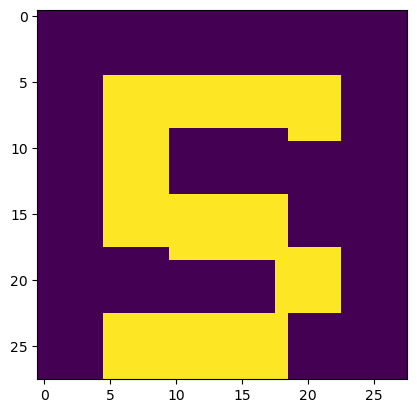

In [53]:
from PIL import Image


lol = np.array([[0,1,0,0,0,0],
               [0,1,0,1,0,0],
               [0,1,0,1,0,0],
               [0,1,1,1,1,1],
               [0,0,0,1,0,0],
               [0,0,0,1,0,0]])

lol = np.array([[0,0,0,0,0,0],
               [0,1,1,1,1,0],
               [0,1,0,0,0,0],
               [0,1,1,1,0,0],
               [0,0,0,0,1,0],
               [0,1,1,1,0,0]])
plt.imshow(lol)

lol = np.array(Image.fromarray(lol.astype(np.uint8)).resize((28, 28))).astype('float32')
plt.imshow(lol)
lol = torch.from_numpy(lol)
lol = lol.unsqueeze(dim=0)
lol.shape

mymodel(lol).argmax(), mymodel(lol)

In [17]:
torch.save(mymodel.state_dict(), 'mymodel_weights.pth')

In [54]:
import csv

state_dict = mymodel.state_dict()
weights_np = {name: param.numpy() for name, param in state_dict.items()}
with open('model_weights.txt', 'w', newline='') as file:
    for name, values in weights_np.items():
        file.write(f'{name}\n')
        flattened_values = values.flatten()
        formatted_values = ' '.join(str(val) for val in flattened_values)
        file.write(f'{formatted_values}\n')

In [57]:
p = mymodel(lol)
p, p.argmax()

(tensor([[-2.3129e+01, -2.4443e+01, -2.4660e+01, -1.1594e+01, -2.9797e+01,
          -1.9193e-05, -2.3568e+01, -2.1179e+01, -1.1517e+01, -1.7149e+01]],
        grad_fn=<LogSoftmaxBackward0>),
 tensor(5))

In [58]:
arr = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
log_softmax_output = torch.nn.functional.log_softmax(arr, dim=0)
print(log_softmax_output)

def Log_Softmax(x: np.array, axis=1):
    x_off = x - np.max(x, axis=axis, keepdims=True)
    return x_off - np.log(np.sum(np.exp(x_off), axis=axis, keepdims=True))

arr = np.array([1,2,3,4,5])
Log_Softmax(arr, 0)

tensor([-4.4519, -3.4519, -2.4519, -1.4519, -0.4519])


array([-4.4519144, -3.4519144, -2.4519144, -1.4519144, -0.4519144])

In [118]:
a = torch.tensor([[-3.1521e-01, -2.2807e-01,  3.0868e-01, -5.6188e-01,  1.6299e-01,
                        1.3524e-01,  6.1492e-01, -4.8257e-01, -2.6522e-01,  2.4271e-01,
                        5.5627e-02, -2.6926e-01, -6.0290e-01,  5.7092e-02,  3.2128e-01,
                       -2.8043e-01, -3.9659e-01, -6.6087e-02,  1.0385e-01,  6.5245e-01,
                        4.2895e-01, -8.5942e-02, -9.2458e-01,  9.7148e-02,  1.1507e-01,
                        7.5272e-01, -3.7444e-01,  8.2718e-04,  2.2866e-01,  5.2132e-01,
                        5.0011e-02, -6.2265e-01],
                      [-1.6413e-01, -3.2849e-01, -1.9757e-01,  5.0441e-01, -1.0054e-01,
                       -1.1351e-01, -1.6969e-01,  1.1939e+00,  3.7225e-01, -4.4305e-02,
                       -2.0207e-01, -4.9463e-01,  7.0804e-01,  8.8240e-02, -5.1779e-01,
                        8.6467e-02,  4.6821e-01, -2.6047e-01,  7.5351e-01, -4.0822e-01,
                       -2.9089e-01,  7.1156e-02,  2.3794e-01,  4.6138e-01,  3.2551e-01,
                       -4.2859e-01,  2.5642e-01, -7.0474e-01,  4.5848e-01, -5.2930e-01,
                        3.9065e-01, -5.7954e-01],
                      [-1.5425e-01, -4.3211e-01,  3.2097e-01,  7.7916e-01,  9.7724e-02,
                        1.2511e-01, -1.2048e-01,  2.7794e-01,  6.3734e-01, -9.2060e-02,
                       -3.7573e-01,  4.1560e-01, -1.8797e-01,  6.4362e-02, -2.1603e-01,
                        3.0408e-01,  3.5300e-01, -8.1310e-01, -1.3470e-01, -7.5507e-01,
                        3.3290e-02,  3.4611e-01, -5.6103e-01, -3.1195e-01,  1.3278e-01,
                        3.0995e-01,  4.5086e-01,  3.4956e-01, -3.3188e-02,  7.4188e-01,
                       -1.9369e-01, -1.6801e-01],
                      [ 3.0281e-01,  5.0837e-01, -7.8883e-02,  5.5434e-01,  7.7518e-02,
                       -2.9105e-02, -3.7815e-01, -1.4402e-01, -1.7695e-01, -3.5729e-02,
                        6.6786e-01, -1.4544e-01, -6.8807e-01,  3.2176e-02, -4.2085e-01,
                        8.8495e-02, -2.3851e-01,  9.1229e-02, -2.0049e-01, -5.6039e-01,
                        7.1621e-01,  2.8555e-01,  6.7837e-01, -3.3254e-01, -2.3127e-01,
                        4.5293e-01,  6.1701e-01,  1.8706e-01,  6.2486e-02, -5.1392e-01,
                        7.8222e-02, -5.5618e-01],
                      [ 3.2844e-01,  3.6730e-01, -2.5503e-01, -1.6727e-01, -5.6584e-03,
                       -2.7817e-02, -4.7414e-02,  2.5808e-01, -4.7853e-01,  3.1727e-02,
                       -5.6614e-03, -1.6180e-01,  7.5934e-01,  1.3426e-01,  6.1562e-01,
                       -2.2324e-01, -9.7558e-02, -5.6095e-01,  1.4370e-01, -5.4782e-01,
                       -3.7639e-01, -3.5981e-01,  2.0803e-01,  1.6582e-01,  4.7118e-02,
                       -1.1410e+00, -6.6067e-01,  9.7701e-01,  7.2571e-02, -2.5366e-01,
                       -1.1113e-01,  6.4926e-01],
                      [-6.2249e-02, -4.4255e-01, -3.0839e-01, -8.7278e-02, -1.5641e-01,
                        2.3660e-02, -5.7918e-01, -3.0453e-01, -6.6628e-01, -1.3370e-01,
                        1.6925e-01,  9.6669e-03,  1.3847e-02, -4.0954e-02,  5.1185e-01,
                        9.0235e-02,  1.9790e-01,  1.0381e+00,  7.3079e-02,  5.6316e-01,
                       -6.6844e-02,  3.3426e-01,  4.2825e-01,  2.3463e-01, -2.9595e-02,
                        1.4693e-01,  8.6365e-01, -1.8739e-01, -9.7557e-01, -4.5658e-01,
                        2.7977e-01,  1.1881e-01],
                      [ 6.4683e-02, -5.8706e-01, -6.2847e-01, -3.0994e-01,  9.8510e-02,
                        1.6686e-01,  9.9470e-01, -2.1298e-01,  1.9703e-01,  6.9643e-02,
                        1.0374e-01, -3.5919e-01,  3.2777e-01, -1.7265e-01, -7.0360e-01,
                       -3.1083e-02,  1.9256e-01,  6.3038e-01,  1.2798e-01,  6.7813e-01,
                       -6.3454e-01, -4.3706e-01, -4.4011e-01,  1.6225e-01,  2.5644e-01,
                       -8.5329e-01,  2.2133e-01,  3.4501e-01, -1.4784e-01,  6.5762e-01,
                        5.6083e-01, -1.3753e-01],
                      [ 4.9628e-01,  5.1547e-01, -4.4306e-01,  6.8837e-01, -4.3164e-02,
                       -1.0585e-01, -5.2065e-01,  5.2778e-02,  2.0013e-01, -5.7863e-02,
                        2.5695e-01, -2.7104e-01,  6.6289e-01,  5.3400e-02, -8.2161e-02,
                        4.0241e-01,  7.2430e-01, -4.1414e-01, -2.7547e-01,  3.2671e-01,
                        9.0995e-02,  1.7969e-01, -7.4467e-01, -7.1007e-02, -2.1443e-01,
                        8.3637e-01, -7.8898e-01, -6.8324e-01,  2.8141e-01, -3.4414e-01,
                       -2.5472e-02, -2.6640e-02],
                      [ 6.1672e-02,  1.9111e-01,  8.7725e-02, -1.2017e-01, -1.2597e-02,
                        3.7177e-02,  1.9472e-02, -5.1177e-01,  5.0283e-01,  9.4269e-02,
                       -6.5442e-03,  1.3747e+00, -6.9385e-01, -1.2777e-01, -1.6183e-01,
                        4.1702e-02, -1.5376e-01,  1.4798e-01, -1.8067e-01,  7.0747e-02,
                        3.7951e-01,  4.6874e-01,  6.1618e-01,  6.1931e-01,  6.9863e-02,
                       -2.7531e-01,  1.8377e-02,  1.2123e-01,  1.7874e-01, -3.2420e-02,
                       -6.8500e-01,  1.3505e-01],
                      [-5.4652e-01,  9.8184e-01,  4.2028e-01, -9.3250e-01, -7.8491e-02,
                        1.9999e-02, -3.7768e-01, -4.0680e-01,  5.5335e-03,  2.7222e-01,
                       -1.5409e-01, -5.7759e-01, -1.6170e-01, -1.0619e-01,  4.7172e-01,
                        2.1920e-01, -6.9297e-01,  2.1643e-01,  1.2170e-01, -3.5548e-01,
                       -9.6257e-02, -4.9062e-01,  7.9360e-01, -2.6535e-01, -1.6683e-01,
                        3.3484e-01, -3.1849e-01, -3.5894e-01,  1.9872e-01,  1.7761e-01,
                       -6.0671e-02,  8.6956e-01]]).reshape(32, 10)

b = np.array([[-3.15212131e-01, -2.28066370e-01,  3.08682024e-01,
        -5.61880767e-01,  1.62992716e-01,  1.35235041e-01,
         6.14918053e-01, -4.82569516e-01, -2.65223384e-01,
         2.42705032e-01],
       [ 5.56269921e-02, -2.69264400e-01, -6.02895319e-01,
         5.70923351e-02,  3.21279705e-01, -2.80425608e-01,
        -3.96592557e-01, -6.60866648e-02,  1.03850119e-01,
         6.52448416e-01],
       [ 4.28947330e-01, -8.59415382e-02, -9.24577653e-01,
         9.71483886e-02,  1.15065612e-01,  7.52724826e-01,
        -3.74441087e-01,  8.27178999e-04,  2.28658944e-01,
         5.21317005e-01],
       [ 5.00113890e-02, -6.22651994e-01, -1.64132580e-01,
        -3.28493744e-01, -1.97574228e-01,  5.04409730e-01,
        -1.00538597e-01, -1.13507949e-01, -1.69685334e-01,
         1.19392133e+00],
       [ 3.72248292e-01, -4.43050079e-02, -2.02065617e-01,
        -4.94627833e-01,  7.08035767e-01,  8.82402211e-02,
        -5.17789781e-01,  8.64670277e-02,  4.68213290e-01,
        -2.60467589e-01],
       [ 7.53507316e-01, -4.08217132e-01, -2.90894210e-01,
         7.11560547e-02,  2.37942994e-01,  4.61384326e-01,
         3.25506538e-01, -4.28588212e-01,  2.56423235e-01,
        -7.04738200e-01],
       [ 4.58484918e-01, -5.29295862e-01,  3.90654832e-01,
        -5.79543352e-01, -1.54251665e-01, -4.32109803e-01,
         3.20974290e-01,  7.79160261e-01,  9.77239832e-02,
         1.25114515e-01],
       [-1.20484173e-01,  2.77938545e-01,  6.37344539e-01,
        -9.20598507e-02, -3.75731349e-01,  4.15600151e-01,
        -1.87967196e-01,  6.43622801e-02, -2.16026634e-01,
         3.04078400e-01],
       [ 3.53001803e-01, -8.13098967e-01, -1.34702578e-01,
        -7.55069494e-01,  3.32899876e-02,  3.46106052e-01,
        -5.61033845e-01, -3.11945021e-01,  1.32776529e-01,
         3.09951425e-01],
       [ 4.50864732e-01,  3.49563330e-01, -3.31884064e-02,
         7.41880298e-01, -1.93688333e-01, -1.68011084e-01,
         3.02805483e-01,  5.08369029e-01, -7.88828358e-02,
         5.54336429e-01],
       [ 7.75178894e-02, -2.91054118e-02, -3.78149390e-01,
        -1.44018397e-01, -1.76946238e-01, -3.57293263e-02,
         6.67863607e-01, -1.45438492e-01, -6.88065648e-01,
         3.21760364e-02],
       [-4.20846552e-01,  8.84954706e-02, -2.38505661e-01,
         9.12285298e-02, -2.00488418e-01, -5.60387015e-01,
         7.16210604e-01,  2.85553366e-01,  6.78370178e-01,
        -3.32536727e-01],
       [-2.31269598e-01,  4.52925175e-01,  6.17005527e-01,
         1.87060937e-01,  6.24860115e-02, -5.13920605e-01,
         7.82218575e-02, -5.56180954e-01,  3.28435004e-01,
         3.67297113e-01],
       [-2.55034268e-01, -1.67269319e-01, -5.65841561e-03,
        -2.78169401e-02, -4.74142618e-02,  2.58084983e-01,
        -4.78528529e-01,  3.17273997e-02, -5.66137210e-03,
        -1.61800072e-01],
       [ 7.59344697e-01,  1.34260505e-01,  6.15618825e-01,
        -2.23239183e-01, -9.75578725e-02, -5.60951591e-01,
         1.43702865e-01, -5.47819555e-01, -3.76386732e-01,
        -3.59810829e-01],
       [ 2.08034635e-01,  1.65821746e-01,  4.71183583e-02,
        -1.14101434e+00, -6.60668314e-01,  9.77013111e-01,
         7.25712031e-02, -2.53663689e-01, -1.11125186e-01,
         6.49258614e-01],
       [-6.22488447e-02, -4.42550123e-01, -3.08392763e-01,
        -8.72776359e-02, -1.56409562e-01,  2.36598309e-02,
        -5.79184055e-01, -3.04525912e-01, -6.66280866e-01,
        -1.33701399e-01],
       [ 1.69249266e-01,  9.66694113e-03,  1.38469096e-02,
        -4.09535691e-02,  5.11845350e-01,  9.02354643e-02,
         1.97901413e-01,  1.03809500e+00,  7.30794445e-02,
         5.63161492e-01],
       [-6.68437332e-02,  3.34260702e-01,  4.28245187e-01,
         2.34631285e-01, -2.95949839e-02,  1.46933407e-01,
         8.63652647e-01, -1.87388569e-01, -9.75569546e-01,
        -4.56581622e-01],
       [ 2.79770613e-01,  1.18813150e-01,  6.46833926e-02,
        -5.87062716e-01, -6.28470540e-01, -3.09938550e-01,
         9.85098705e-02,  1.66860208e-01,  9.94701385e-01,
        -2.12979317e-01],
       [ 1.97025090e-01,  6.96425959e-02,  1.03736907e-01,
        -3.59190166e-01,  3.27767849e-01, -1.72652721e-01,
        -7.03602791e-01, -3.10829636e-02,  1.92561060e-01,
         6.30379260e-01],
       [ 1.27983496e-01,  6.78126991e-01, -6.34539247e-01,
        -4.37063098e-01, -4.40108508e-01,  1.62254885e-01,
         2.56442606e-01, -8.53293121e-01,  2.21333206e-01,
         3.45005989e-01],
       [-1.47835657e-01,  6.57621622e-01,  5.60828328e-01,
        -1.37530535e-01,  4.96282279e-01,  5.15467703e-01,
        -4.43061590e-01,  6.88367128e-01, -4.31643464e-02,
        -1.05847232e-01],
       [-5.20654321e-01,  5.27781397e-02,  2.00125650e-01,
        -5.78627028e-02,  2.56945699e-01, -2.71042407e-01,
         6.62889421e-01,  5.33999130e-02, -8.21609572e-02,
         4.02406633e-01],
       [ 7.24295318e-01, -4.14136857e-01, -2.75474399e-01,
         3.26712191e-01,  9.09954458e-02,  1.79694504e-01,
        -7.44672120e-01, -7.10071549e-02, -2.14428857e-01,
         8.36370945e-01],
       [-7.88981676e-01, -6.83238208e-01,  2.81406730e-01,
        -3.44139636e-01, -2.54715718e-02, -2.66401898e-02,
         6.16719835e-02,  1.91111967e-01,  8.77246037e-02,
        -1.20171033e-01],
       [-1.25973951e-02,  3.71767990e-02,  1.94723140e-02,
        -5.11767507e-01,  5.02831340e-01,  9.42694768e-02,
        -6.54417509e-03,  1.37470901e+00, -6.93854511e-01,
        -1.27774820e-01],
       [-1.61826789e-01,  4.17019054e-02, -1.53764531e-01,
         1.47975579e-01, -1.80671677e-01,  7.07468167e-02,
         3.79508466e-01,  4.68743145e-01,  6.16178334e-01,
         6.19305313e-01],
       [ 6.98627383e-02, -2.75307715e-01,  1.83767825e-02,
         1.21230781e-01,  1.78736836e-01, -3.24202329e-02,
        -6.85003996e-01,  1.35052830e-01, -5.46518803e-01,
         9.81837630e-01],
       [ 4.20283109e-01, -9.32503700e-01, -7.84907416e-02,
         1.99985690e-02, -3.77680242e-01, -4.06795830e-01,
         5.53354714e-03,  2.72224724e-01, -1.54090315e-01,
        -5.77591002e-01],
       [-1.61703244e-01, -1.06186025e-01,  4.71724898e-01,
         2.19196543e-01, -6.92972600e-01,  2.16430336e-01,
         1.21696241e-01, -3.55475128e-01, -9.62572247e-02,
        -4.90616828e-01],
       [ 7.93603837e-01, -2.65349537e-01, -1.66829109e-01,
         3.34838122e-01, -3.18492889e-01, -3.58941138e-01,
         1.98724672e-01,  1.77607551e-01, -6.06712177e-02,
         8.69556665e-01]]).reshape(32, 10)

print(a.shape, b.shape)
print(a[0].numpy())
print(b[0])
print(torch.nn.functional.log_softmax(a, dim=0).argmax(), Log_Softmax(b, axis=0).argmax())
print(torch.nn.functional.relu(torch.tensor([-5,2,3,4,5])))

torch.Size([32, 10]) (32, 10)
[-0.31521 -0.22807  0.30868 -0.56188  0.16299  0.13524  0.61492 -0.48257
 -0.26522  0.24271]
[-0.31521213 -0.22806637  0.30868202 -0.56188077  0.16299272  0.13523504
  0.61491805 -0.48256952 -0.26522338  0.24270503]
tensor(267) 267
tensor([0, 2, 3, 4, 5])


In [111]:
a.flatten() == b.flatten()
np.abs(a.flatten()-b.flatten()).sum()

tensor(0.0007, dtype=torch.float64)

In [159]:
z = np.zeros(784).astype(np.float32)
z = torch.from_numpy(z)
mymodel(z.unsqueeze(dim=0))

tensor([[-3.8635, -1.4909, -2.9237, -3.1713, -2.5869, -1.0968, -2.8640, -2.2018,
         -3.6800, -2.8812]], grad_fn=<LogSoftmaxBackward0>)